<a href="https://colab.research.google.com/github/jbpost2/ST-554-Big-Data-With-Python-Course-Notes/blob/main/01_Programming_in_python/20_Plotting_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting with `pandas`

Justin Post

---

Let's see the basic functionality that `pandas` provides for plotting `series` (columns essentially) and `DataFrames`

Looking through the [help files is really useful](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html). This link is the the `.plot()` method but you can search for other methods pretty easily! The documentation will provide you all of the options you can pass. We'll only discuss a few and the big picture ideas.

- Let's process our titanic data from the previous notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#readin data
titanic_data = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/titanic.csv")

#remove some columns and a bad row
sub_titanic_data = titanic_data.drop(columns = ["body", "cabin", "boat"], axis = 1) \
                               .iloc[:(titanic_data.shape[0]-1)]
#create category versions of the variables (some code omitted)
sub_titanic_data["embarkedC"] = sub_titanic_data.embarked.astype("category")
sub_titanic_data.embarkedC = sub_titanic_data.embarkedC.cat.rename_categories(
                                    ["Cherbourg", "Queenstown", "Southampton"])
sub_titanic_data["sexC"] = sub_titanic_data.sex.astype("category")
sub_titanic_data.sexC = sub_titanic_data.sexC.cat.rename_categories(["Female", "Male"])
sub_titanic_data["survivedC"] = sub_titanic_data.survived.astype("category")
sub_titanic_data.survivedC = sub_titanic_data.survivedC.cat.rename_categories(["Died", "Survived"])

---

## Barplots with `pandas`

We saw the barplot for summarizing categorical data. We'll cover two different methods to create bar plots in pandas:

- `.plot.bar()` method on a `series` or `dataframe`
- `.plot()` method with `kind = 'bar'` specified

In [5]:
table = sub_titanic_data.embarkedC.value_counts()
print(type(table))
table

<class 'pandas.core.series.Series'>


Southampton    914
Cherbourg      270
Queenstown     123
Name: embarkedC, dtype: int64

Note that this is a `pandas` `series`. We can use the `.plot.bar()` method on this series to get a bar plot.

<Axes: >

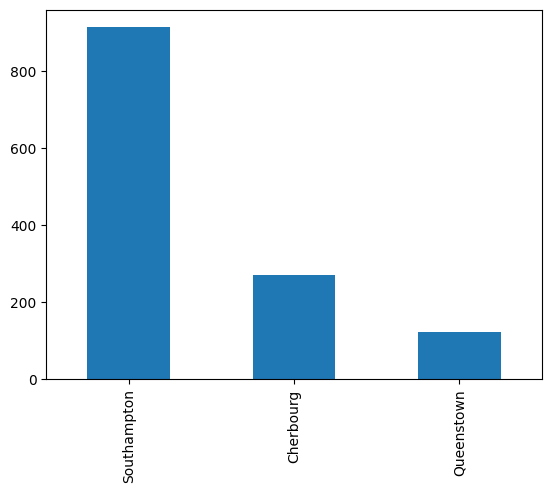

In [6]:
table.plot.bar()

We can then apply the `matplotlib` functionality to update/modify the plot (notice we already read in `matplotlib.pyplot` as `plt`.

(array([0, 1, 2]),
 [Text(0, 0, 'Southampton'),
  Text(1, 0, 'Cherbourg'),
  Text(2, 0, 'Queenstown')])

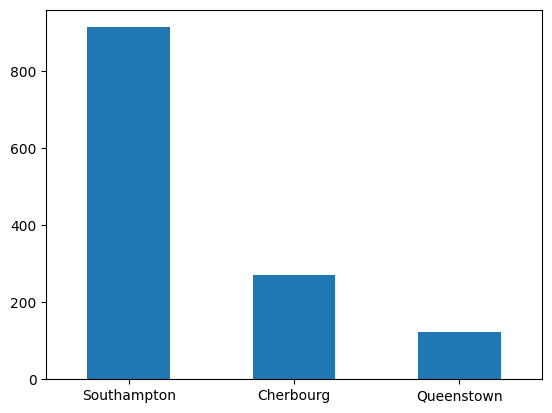

In [7]:
table.plot.bar()
plt.xticks(rotation = 0)

Alternatively, we can use the slightly more flexible `.plot()` method on a series where we specify the `kind=` of the plot to create.

<Axes: >

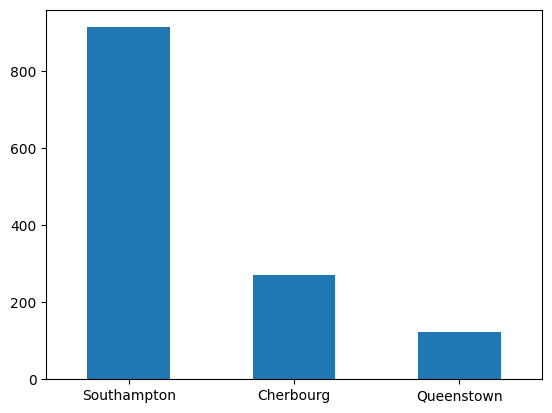

In [8]:
table.plot(kind = "bar", rot = 0) #can use additional arg rather than additional function call

---

Where we really gain is when trying to bring in a multivariate relationship

- For instance, we can color the bars by another categorical variable in the `dataframe` pretty easily!

First, create the contingency table for two variables (remember this returns a `DataFrame`)

In [9]:
table = pd.crosstab(sub_titanic_data["embarkedC"], sub_titanic_data["survivedC"])
print(type(table))
table

<class 'pandas.core.frame.DataFrame'>


survivedC,Died,Survived
embarkedC,,
Cherbourg,120,150
Queenstown,79,44
Southampton,610,304


Now let's use the `.plot.bar()` method on this data frame.

<Axes: xlabel='embarkedC'>

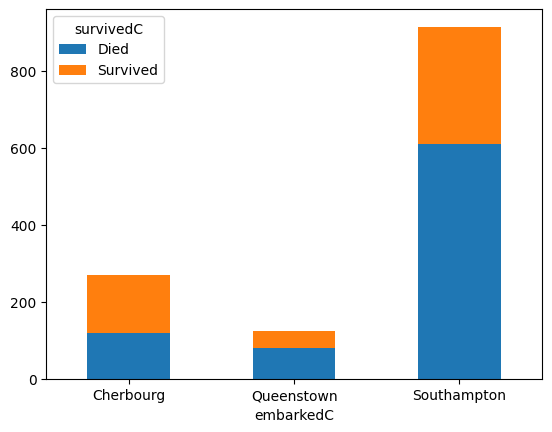

In [10]:
table.plot.bar(stacked = True, rot = 0)

We can do this with the `.plot()` method as well.

<Axes: xlabel='embarkedC'>

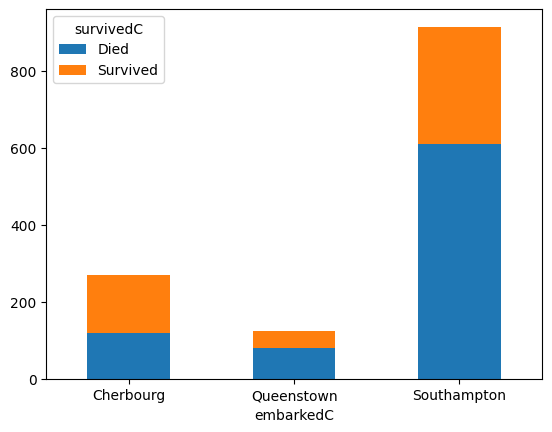

In [11]:
table.plot(stacked = True, kind = "bar", rot = 0)

If we want side-by-side bar plots, we can just remove the `stacked = True` argument.

<Axes: xlabel='embarkedC'>

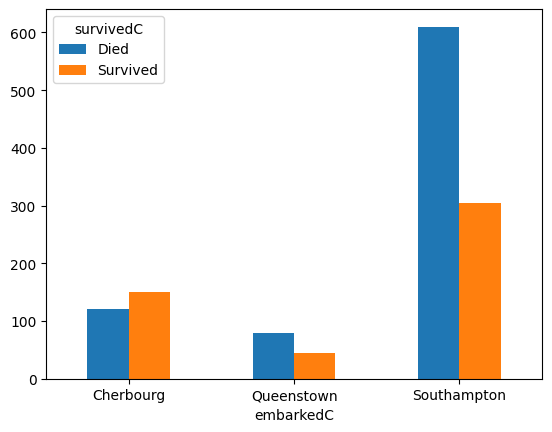

In [12]:
table.plot.bar(rot = 0)

---

## Plotting Numeric Variables    

Recall: Numeric variable have entries that are a numerical value where math can be performed

Goal: describe the shape, center, and spread of the distribution

- Shape can be described well via a histogram or density plot
- Boxplots provide a good summary of the distribution as well


---

### Histogram with `pandas`

**Histogram**
- Bin data to show distribution of observations
- Done via `.plot.hist()` or `.plot(kind = "hist")` method on a series or data frame
- A `.hist()` method also exists!

First, the `.plot.hist()` method on a series (we'll also fix it up a bit using `matplotlib.pyplot` functionality.

Text(0.5, 1.0, 'Histogram of Age for Titanic Passengers')

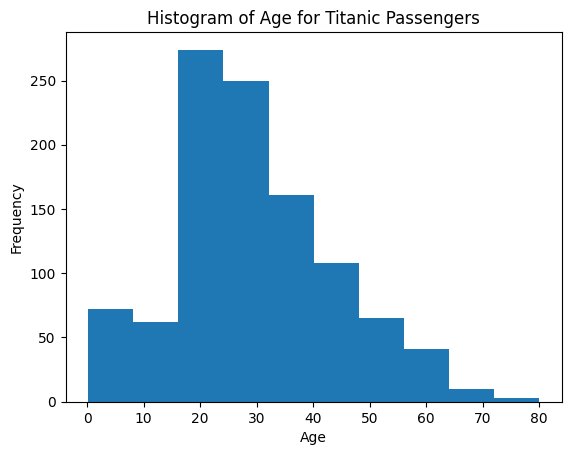

In [14]:
sub_titanic_data["age"].plot.hist()
plt.xlabel("Age")
plt.title("Histogram of Age for Titanic Passengers")

- Specify # of bins with `bins =`
- Note we also return the series in a different way here (just to show you can use either)

[Text(0.5, 0, 'Age')]

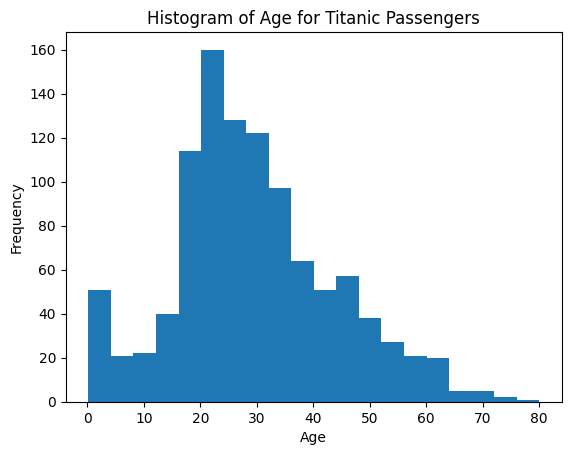

In [17]:
#can add label/title here (xlabel doesn't seem to work as intended...)
#instead we'll use the .set() method on the histogram to set the xlabel
sub_titanic_data.age.plot.hist(bins = 20, title = "Histogram of Age for Titanic Passengers") \
    .set(xlabel = "Age")

#### Overlaying Two Histograms

- To overlay two histograms on the same graph, create two histograms and use `alpha = 0-1 value`. This sets the transparency.
  - alpha = 1 is not transparent at all
  - alpha = 0 is completely transparent

Let's create histograms of age for those that Survived and those that Died.
- We should also set up the bins manually so they are the same bin widths and locations (for better comparison)
- bins can be specified via the `bins = ` argument

In [18]:
bin_ends = 10
bins = [i*max(sub_titanic_data.age)/bin_ends for i in range(0, bin_ends + 1)]
print(bins)

[0.0, 8.0, 16.0, 24.0, 32.0, 40.0, 48.0, 56.0, 64.0, 72.0, 80.0]


- Obtain subsets of data needed

In [47]:
age_died = sub_titanic_data.loc[sub_titanic_data.survivedC == "Died", "age"] #series for died
age_survived = sub_titanic_data.loc[sub_titanic_data.survivedC == "Survived", "age"] #series for survived

Create the plot using the `.plot.hist()` method. By creating two plots in the same cell, they will be overlayed.
- Notice the use of `label()` to automatically create a legend (similar to what we did with `matplotlib`

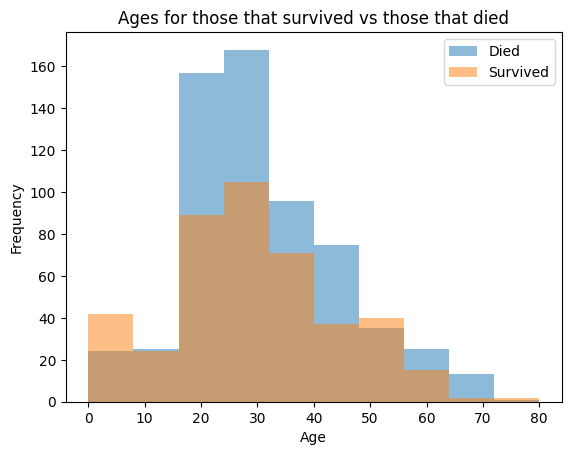

In [48]:
age_died.plot.hist(bins = bins, alpha = 0.5, label = "Died",
                   title = "Ages for those that survived vs those that died") \
                   .set(xlabel = "Age")
age_survived.plot.hist(bins = bins, alpha = 0.5, label = "Survived")
plt.legend()

- `pandas` will automatically overlay data from different columns of the **same** data frame
- That is, if we use the `plot.hist()` method on a data frame with two numeric variables, it will plot both of those on the same plot
  + To use that here we need to make that kind of data frame...
  + Need two columns, one representing ages for those that survived and one for those that died

In [49]:
age_died = sub_titanic_data.loc[sub_titanic_data.survivedC == "Died", "age"] #809 values
age_survived = sub_titanic_data.loc[sub_titanic_data.survivedC == "Survived", "age"] #500 values

- Note the difference in the number of observations! This means that putting them together into a data frame isn't super seamless.

(500, 2)


<Axes: ylabel='Frequency'>

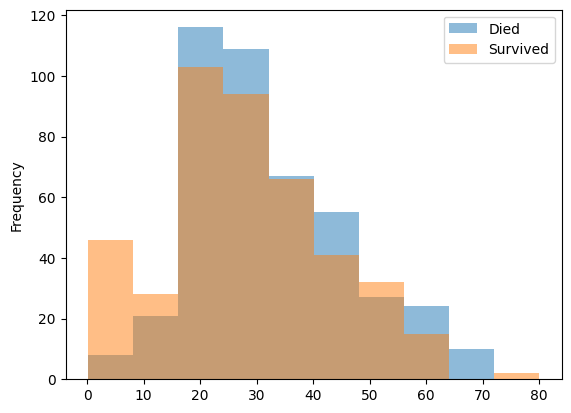

In [50]:
temp = pd.DataFrame(zip(age_died, age_survived), columns = ["Died", "Survived"])
print(temp.shape)
#only has 500 rows instead of 809!
temp.plot.hist(alpha = 0.5)

- How do we fix that?

  + We can fill in `NaN` values for the shorter series so they end up the same length.

In [51]:
age_survived = age_survived.append(pd.Series([np.nan for _ in range(308)]))
age_survived

<ipython-input-51-0d2bdab6ca98>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  age_survived = age_survived.append(pd.Series([np.nan for _ in range(308)]))


0      29.0000
1       0.9167
5      48.0000
6      63.0000
8      53.0000
        ...   
303        NaN
304        NaN
305        NaN
306        NaN
307        NaN
Length: 808, dtype: float64

- Now we can zip these together into a data frame and plot as we'd like!

(808, 2)


[Text(0.5, 0, 'Age')]

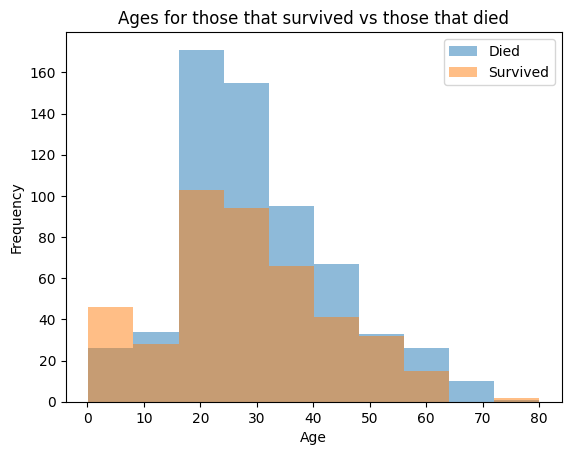

In [59]:
plotting_df = pd.DataFrame(zip(age_died, age_survived),
                      columns = ["Died", "Survived"])
print(plotting_df.shape)
plotting_df.plot.hist(alpha = 0.5, title = "Ages for those that survived vs those that died") \
    .set(xlabel = "Age")

#### Side-by-side Histograms

- Can place two graphs next to each other with `.hist()` method (notice this is a different method!)
  + Specify a `column` variable and a `by` variable
- These don't have the same bin widths

array([<Axes: title={'center': 'Died'}>,
       <Axes: title={'center': 'Survived'}>], dtype=object)

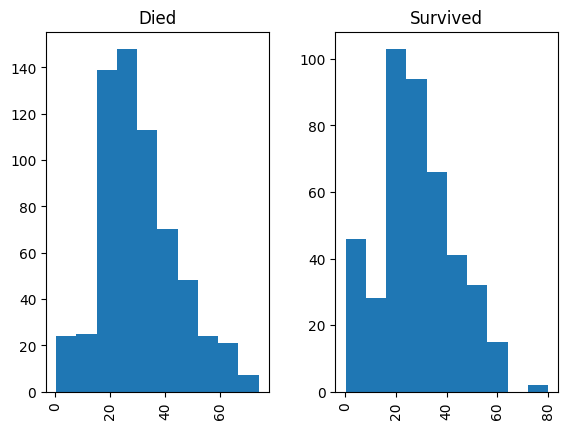

In [61]:
sub_titanic_data.hist(column = "age", by = "survivedC")

- We could also use the `.groupby()` functionality but the result is a bit subpar as it doesn't label the graphs.

survivedC
Died        [[Axes(0.125,0.11;0.775x0.77)]]
Survived    [[Axes(0.125,0.11;0.775x0.77)]]
dtype: object

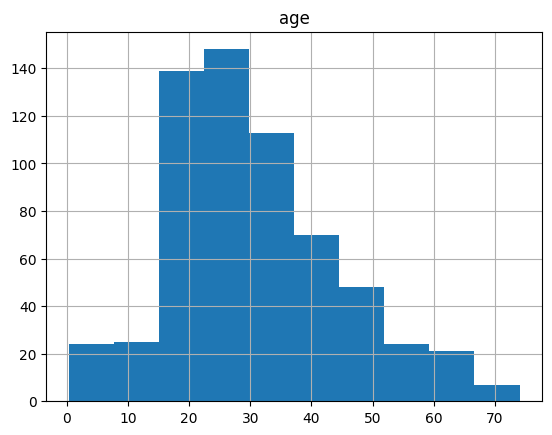

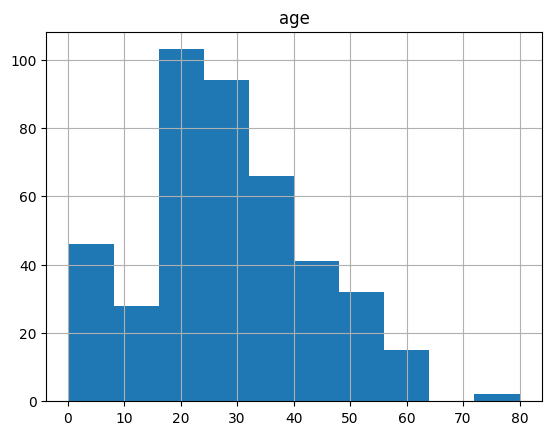

In [63]:
sub_titanic_data[["age", "survivedC"]].groupby("survivedC").hist()

---

### Kernel smoother with `pandas`

- **Kernel Smoother** - Smoothed version of a histogram  
- 'Kernel' determines weight given to nearby points    
  + Use `.plot.density()` or `plot(kind = "density")` method
  + `bw_method = #` specifies how 'smooth' you want the graph to be
    + smaller values imply using a smaller bandwidth (more variability)
    + larger values imply using a larger bandwidth (more smooth)

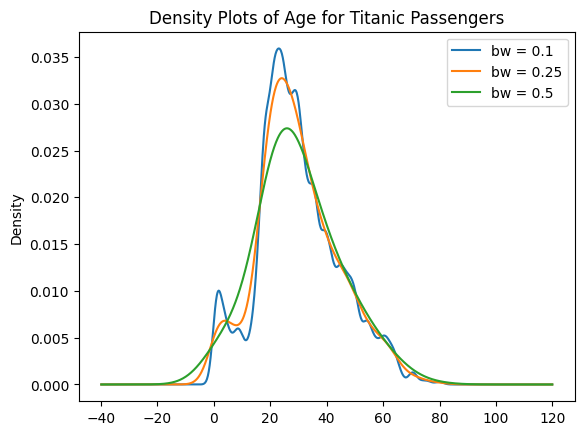

In [56]:
sub_titanic_data.age.plot.density(bw_method = 0.1, label = "bw = 0.1",
                                  title = "Density Plots of Age for Titanic Passengers")
sub_titanic_data.age.plot.density(bw_method = 0.25, label = "bw = 0.25")
sub_titanic_data.age.plot.density(bw_method = 0.5, label = "bw = 0.5")
plt.legend()

---

### Boxplots with `pandas`

- **Boxplot** - Provides the five number summary in a graph
  - Min, Q1, Median, Q3, Max  
  - Often show possible outliers as well  
  - Use `.plot.box()` or `plot(kind = "box")` method
  - A `.boxplot()` method also exists!

First the `.plot.box()` method on a series

<Axes: >

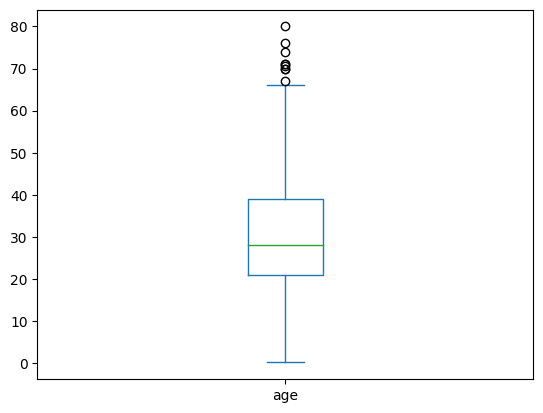

In [64]:
sub_titanic_data.age.plot.box()

- Fine.. but usually we want to compare these boxplots across another variable. To do this the `.boxplot()` method on a data frame is very useful!
- Similar to the `.hist()` method we specify a `column` and `by` variable

<Axes: title={'center': 'age'}, xlabel='survivedC'>

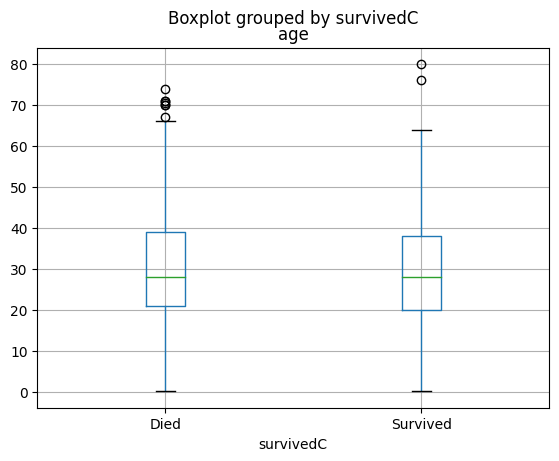

In [65]:
sub_titanic_data.boxplot(column = ["age"], by = "survivedC")

---

### Scatter Plots with `pandas`

- **Scatter Plot** - graphs points corresponding to each observation
  + Use `.plot.scatter()` or `plot(kind = "scatter")` method on a data frame with `x =`, and `y =`

<Axes: title={'center': 'Scatter plots rule!'}, xlabel='age', ylabel='fare'>

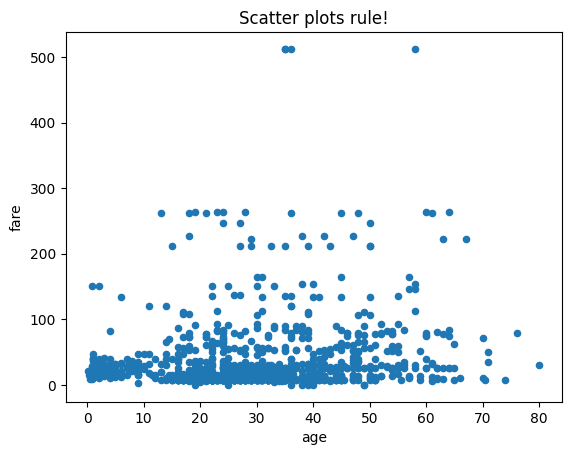

In [66]:
sub_titanic_data.plot.scatter(x = "age", y = "fare", title = "Scatter plots rule!")

- Easy to modify! [Check the help for arguments](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter) (specifically the [keyword arguments](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) that get passed to `.plot()`) but we can specify different `marker` values, a `title`, and more!

<Axes: title={'center': "Oh, V's!"}, xlabel='age', ylabel='fare'>

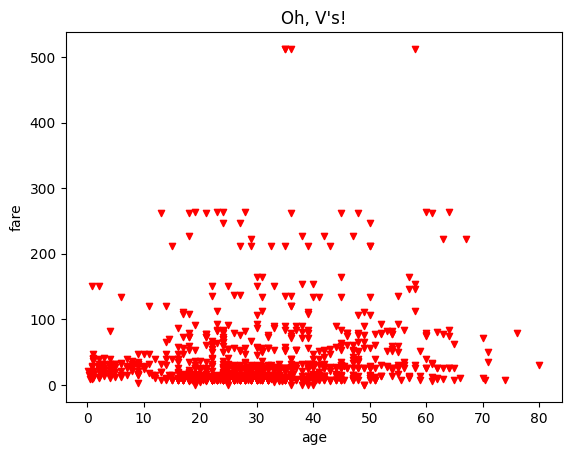

In [67]:
#c = color, marker is a matplotlib option
sub_titanic_data.plot.scatter(x = "age", y = "fare", c = "Red", marker = "v", title = "Oh, V's!")

- We can easily modify aspects of the plot based on a variable as well!
- This is great as it allows us to bring a third varaible in
- Here we color by a category variable

<Axes: xlabel='age', ylabel='fare'>

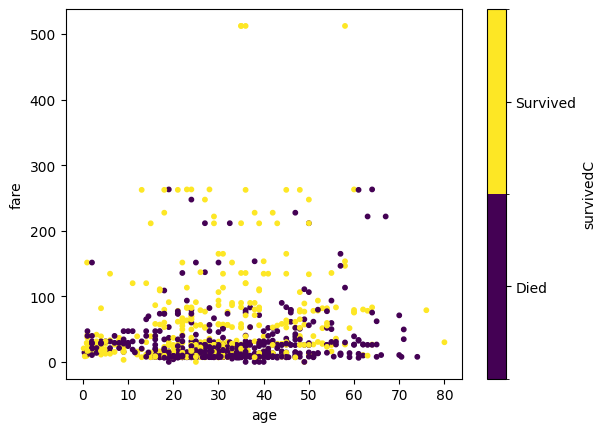

In [68]:
#s for size (should be a numeric column), cmap can be used with c for specifying color scales
sub_titanic_data.plot.scatter(x = "age", y = "fare", c = "survivedC", cmap = "viridis", s = 10)

---

#### Matrix of Scatter Plots

- `.plotting.scatter_matrix()` function will produce basic graphs showing relationships!
- Here we grab the numeric variables from the data frame

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fare', ylabel='age'>,
        <Axes: xlabel='survived', ylabel='age'>,
        <Axes: xlabel='sibsp', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fare'>,
        <Axes: xlabel='fare', ylabel='fare'>,
        <Axes: xlabel='survived', ylabel='fare'>,
        <Axes: xlabel='sibsp', ylabel='fare'>],
       [<Axes: xlabel='age', ylabel='survived'>,
        <Axes: xlabel='fare', ylabel='survived'>,
        <Axes: xlabel='survived', ylabel='survived'>,
        <Axes: xlabel='sibsp', ylabel='survived'>],
       [<Axes: xlabel='age', ylabel='sibsp'>,
        <Axes: xlabel='fare', ylabel='sibsp'>,
        <Axes: xlabel='survived', ylabel='sibsp'>,
        <Axes: xlabel='sibsp', ylabel='sibsp'>]], dtype=object)

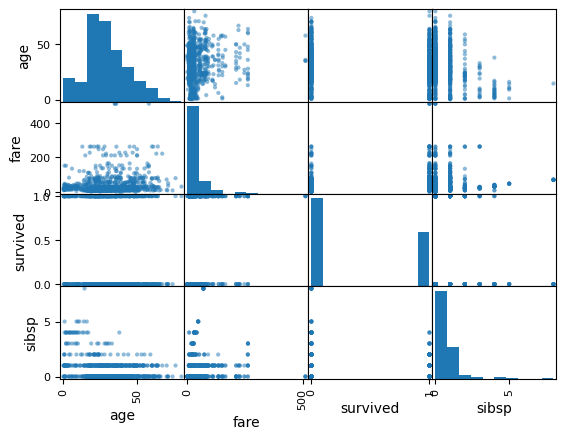

In [69]:
pd.plotting.scatter_matrix(sub_titanic_data[["age", "fare", "survived", "sibsp"]])

---

## Quick Video
This video shows an example of using pandas for plotting (Coming soon!)

---

# Recap

- Creating visualizations is an important part of an EDA

- Goal: Describe the distribution

- `pandas` has nice functionality for creating common plots

    + `.plot()` method

- We only covered a few plots but the concepts are similar for others

- May want to [check out seaborn for quick ways to do fancier plots!](https://seaborn.pydata.org/tutorial/introduction.html)